# First, let’s import all the necessary libraries:

In [1]:
pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf 

# Loading the dataset!

In [3]:
ipl = pd.read_csv('ipl_dataset.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# Data Pre-processing

In [4]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)
df

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129


# Further Pre-Processing

In [5]:
X = df.drop(['total'], axis =1)
y = df['total']
X


,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian


In [6]:
y

0        222
1        222
2        222
3        222
4        222
        ... 
76009    129
76010    129
76011    129
76012    129
76013    129
Name: total, Length: 76014, dtype: int64

# Label Encoding

In [7]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])


In [8]:
X['venue']

0        14
1        14
2        14
3        14
4        14
         ..
76009    23
76010    23
76011    23
76012    23
76013    23
Name: venue, Length: 76014, dtype: int32

In [9]:
X['bat_team']

0        6
1        6
2        6
3        6
4        6
        ..
76009    7
76010    7
76011    7
76012    7
76013    7
Name: bat_team, Length: 76014, dtype: int32

In [10]:
X['bowl_team'] 

0        12
1        12
2        12
3        12
4        12
         ..
76009    10
76010    10
76011    10
76012    10
76013    10
Name: bowl_team, Length: 76014, dtype: int32

In [11]:
X['batsman']

0        328
1         61
2         61
3         61
4         61
        ... 
76009    172
76010    172
76011    172
76012    215
76013    172
Name: batsman, Length: 76014, dtype: int32

In [12]:
X['bowler']

0        201
1        201
2        201
3        201
4        201
        ... 
76009     96
76010     96
76011     96
76012     96
76013     96
Name: bowler, Length: 76014, dtype: int32

# Train Test Split



In [13]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
X_train

,venue,bat_team,bowl_team,batsman,bowler
31043,15,12,0,78,121
1720,22,2,4,393,48
62369,14,12,13,384,175
74763,21,4,6,398,157
10506,2,7,2,266,218
...,...,...,...,...,...
37194,34,6,7,221,272
6265,26,7,9,347,292
54886,1,7,0,213,183
860,15,0,7,258,275


In [15]:
 X_test

,venue,bat_team,bowl_team,batsman,bowler
12590,18,2,12,122,128
74893,9,3,2,171,72
56763,34,7,0,133,228
19428,1,7,2,350,210
30216,5,0,1,284,40
...,...,...,...,...,...
52464,14,12,2,19,191
23921,8,2,4,93,207
24202,26,5,9,284,280
61097,22,4,0,126,7


In [16]:
y_train

31043    205
1720     158
62369    227
74763    167
10506    116
        ... 
37194    140
6265     145
54886    173
860      208
15795    171
Name: total, Length: 53209, dtype: int64

In [17]:
y_test

12590    134
74893    195
56763    183
19428    183
30216    193
        ... 
52464    186
23921    231
24202    109
61097    130
62584    163
Name: total, Length: 22805, dtype: int64

# Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
X_train_scaled

array([[0.44117647, 0.92307692, 0.        , 0.1902439 , 0.36890244],
       [0.64705882, 0.15384615, 0.30769231, 0.95853659, 0.14634146],
       [0.41176471, 0.92307692, 1.        , 0.93658537, 0.53353659],
       ...,
       [0.02941176, 0.53846154, 0.        , 0.5195122 , 0.55792683],
       [0.44117647, 0.        , 0.53846154, 0.62926829, 0.83841463],
       [0.41176471, 0.92307692, 0.        , 0.93658537, 0.5152439 ]])

In [20]:
X_test_scaled

array([[0.52941176, 0.15384615, 0.92307692, 0.29756098, 0.3902439 ],
       [0.26470588, 0.23076923, 0.15384615, 0.41707317, 0.2195122 ],
       [1.        , 0.53846154, 0.        , 0.32439024, 0.69512195],
       ...,
       [0.76470588, 0.38461538, 0.69230769, 0.69268293, 0.85365854],
       [0.64705882, 0.30769231, 0.        , 0.30731707, 0.02134146],
       [0.73529412, 0.84615385, 0.23076923, 0.2902439 , 0.25      ]])

# Define the Neural Network

In [21]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


In [22]:
huber_loss

In [23]:
model.compile(optimizer='adam', loss=huber_loss)  

# Model Training

In [24]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 55.6565 - val_loss: 22.1524
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 22.3237 - val_loss: 22.0435
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 22.4069 - val_loss: 22.1937
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.2635 - val_loss: 21.9431
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - loss: 22.0420 - val_loss: 22.5954
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 22.1455 - val_loss: 21.8416
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 22.2607 - val_loss: 21.8176
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - loss: 22.0944 - val_loss: 23.0108
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 22.1855 - val_loss: 21.8068
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 22.0302 - val_loss: 21.7900
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 22.0548 - val_loss: 22.0816
Epoch 12/50
832/8

<Axes: >

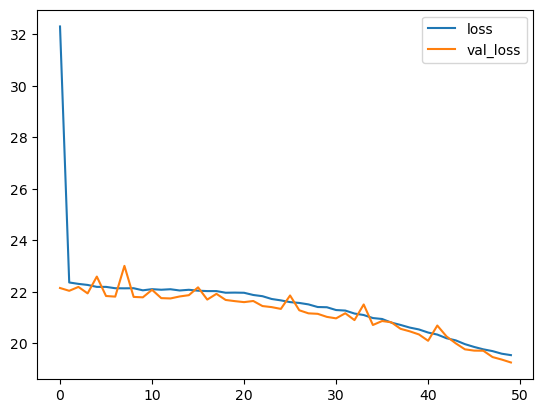

In [25]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


# Model Evaluation

In [26]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)


713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


19.754349185782182

# Let’s create an Interactive Widget

In [29]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)


In [30]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()